In [7]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig
import peakutils

%matplotlib notebook

In [8]:
rpmvals = ['4250', '4500', '4750']
acquisitions = ['3001']
runs = 15

dfiles = []
for rpmno, rpmval in enumerate(rpmvals):
    dfiles.append([])
    for acqno, acq in enumerate(acquisitions):
        dfiles[rpmno].append([])
        for r in range(runs):
            acqfiles = "DATA/microclose/%srpm/%s_closing_%d.aup" % (rpmval, acq, r)
            dfiles[rpmno][acqno].append(acqfiles)

In [14]:
def IRcalib(aupfile, freqIR, chIR):
    auf = audacity.Aup(aupfile)
    print(aupfile)
    sr = auf.rate
    IRdata = auf.get_channel_data(chIR)    
    IR_RMS = np.sqrt(np.mean((IRdata-np.mean(IRdata))**2))
    return IR_RMS

In [15]:
chIR = 2
freqIR = 9820
# nfft = 1024*2

In [24]:
IRacqs = []
for rpmfiles in dfiles:
    for acqfiles in rpmfiles:
        IRvals = []
        for file in acqfiles:
            IRval = IRcalib(file, freqIR, chIR)
            IRvals.append(IRval)
        IRacqs.append(IRvals)

DATA/microclose/4250rpm/3001_closing_0.aup
DATA/microclose/4250rpm/3001_closing_1.aup
DATA/microclose/4250rpm/3001_closing_2.aup
DATA/microclose/4250rpm/3001_closing_3.aup
DATA/microclose/4250rpm/3001_closing_4.aup
DATA/microclose/4250rpm/3001_closing_5.aup
DATA/microclose/4250rpm/3001_closing_6.aup
DATA/microclose/4250rpm/3001_closing_7.aup
DATA/microclose/4250rpm/3001_closing_8.aup
DATA/microclose/4250rpm/3001_closing_9.aup
DATA/microclose/4250rpm/3001_closing_10.aup
DATA/microclose/4250rpm/3001_closing_11.aup
DATA/microclose/4250rpm/3001_closing_12.aup
DATA/microclose/4250rpm/3001_closing_13.aup
DATA/microclose/4250rpm/3001_closing_14.aup
DATA/microclose/4500rpm/3001_closing_0.aup
DATA/microclose/4500rpm/3001_closing_1.aup
DATA/microclose/4500rpm/3001_closing_2.aup
DATA/microclose/4500rpm/3001_closing_3.aup
DATA/microclose/4500rpm/3001_closing_4.aup
DATA/microclose/4500rpm/3001_closing_5.aup
DATA/microclose/4500rpm/3001_closing_6.aup
DATA/microclose/4500rpm/3001_closing_7.aup
DATA/m

<IPython.core.display.Javascript object>


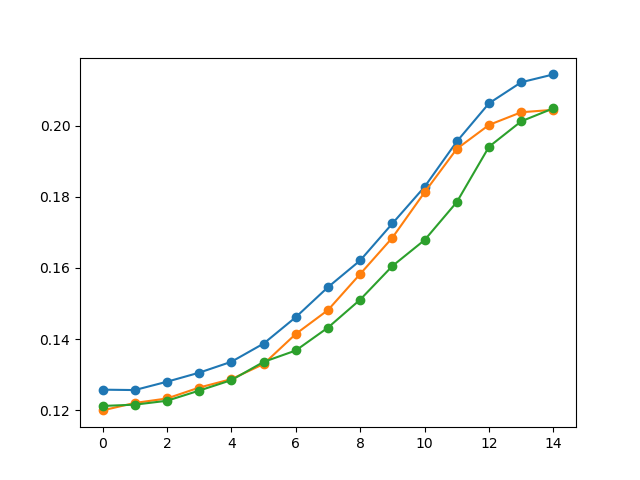

In [25]:
plt.figure()
for acq in IRacqs:
    plt.plot(acq, 'o-')